In [14]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time

def hypothesis(A1, A2, X1, X2):
    h = A1*X1 + A2*X2
    return h

def calculateErrorSurface(y, X1, X2, M):
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-30.0, 34.0, N)
    a2 = np.linspace(-30.0, 34.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            a1 = A1[iter1][iter2]
            a2 = A2[iter1][iter2]
            h = hypothesis(a1, a2, X1, X2)
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - h))

    return J, A1, A2

def plotSurfaceError3D(J, A1, A2):
    # Plot cost-function surface.
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$J_e$');
    plt.title('Cost-function\'s Surface')
    ax.view_init(20, 45)
    fig
    #Show the plot.
    plt.show()

# function to compute gradient of error function w.r.t. theta 
def gradient(y, X, h, batch_size):
    grad = -(2/batch_size)*X.T.dot(y - h)
    return grad 

def BatchGradientDescent(y, X_1, X_2, alpha, error_threshold, maxNumIter, numParamsA, M):
    a = np.zeros((2, maxNumIter))
    Jgd = np.zeros(maxNumIter)
    a[0, 0] = -20;
    a[1, 0] = -20;
    h = hypothesis(a[0, 0], a[1, 0], X_1, X_2)
    Jgd[0] = (1/M)*np.sum(np.power(y - h, 2))
    
    error = 1
    iteration = 0
    X = np.block([x1, x2])
    while error > error_threshold and iteration < maxNumIter-1:
        h = hypothesis(a[0, iteration], a[1, iteration], X_1, X_2)
        grad = gradient(y, X, h, M)
        a_aux = a[:, iteration] - alpha*grad
        a[0, iteration+1] = a_aux[0,0]
        a[1, iteration+1] = a_aux[1,0]
        h = hypothesis(a[0, iteration+1], a[1, iteration+1], X_1, X_2)
        Jgd[iteration+1] = (1/M)*np.sum(np.power(y - h, 2))
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        iteration += 1
    return Jgd, a, iteration

def plotContour(J, A1, A2, a):
    fig = plt.figure(figsize=(3, 3))
    cp = plt.contour(A1, A2, J)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.xlabel('$a_1$')
    plt.ylabel('$a_2$')
    plt.title('Cost-function\'s Contour')
    #plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
    plt.plot(a[0, :], a[1, :], 'kx')
    plt.xticks(np.arange(-32, 34, step=4.0))
    plt.yticks(np.arange(-32, 34, step=4.0))
    plt.show()

def plotErrorVsIteration(Jgd, iteration):
    fig = plt.figure(figsize=(3, 3))
    plt.plot(np.arange(0, iteration), Jgd[0:iteration])
    plt.xlim((0, iteration))
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('$J_e$')
    plt.title('Error vs. Iteration number')
    plt.show()
    
def yVsH(yt, a1, a2, x1t, x2t, M):
    h = hypothesis(a1, a2, x1t, x2t)
    error = (yt - h)
    errorMedia = (1/M) * np.sum((yt - h)**2)
    print('Media of the error: ' + str(errorMedia))
    plt.plot(error)
    plt.xlabel('Orden de entrada')
    plt.ylabel('Diferencia entre Y y H')
    plt.title('Medida de erro entre Y y H')
    plt.show() 
    
#-------------------------------------------------------------------------------------------------------------------------------
np.random.seed(1234)
M = 1000
media1 = 0.0
desvio1 = 1.0
media2 = 10.0
desvio2 = 10.0
x1 = np.random.normal(loc=media1, scale=desvio1, size=(M, 1))
x2 = np.random.normal(loc=media2, scale=desvio2, size=(M, 1))
w = 0
y = x1 + x2 + w
meanY = np.mean(y)
stdY = np.std(y)

x1t = np.random.normal(loc=media1, scale=desvio1, size=(M, 1))
x2t = np.random.normal(loc=media2, scale=desvio2, size=(M, 1))
yt = x1t + x2t + w



 a) Sem Escalonamento


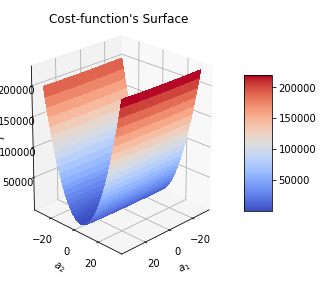

Passo de aprendizagem: 0.002


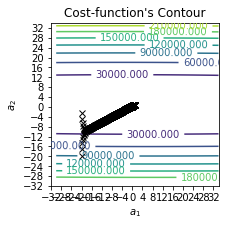

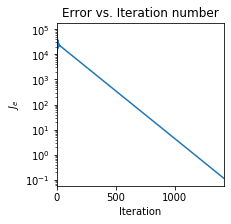

a1:0.9576850652332392
a2: 0.976807924029322


In [15]:
print('\n\n a) Sem Escalonamento')
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2, M)
plotSurfaceError3D(J, A1, A2)

alpha = 0.002 # learning rate
print('Passo de aprendizagem: ' + str(alpha))
error_threshold = 0.001
numParamsA = 2

maxNumIter = 2000

Jgd, a, iteration = BatchGradientDescent(y, x1, x2, alpha, error_threshold, maxNumIter, numParamsA, M)
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)
print('a1:' + str(a[0,iteration]) + '\na2: ' + str(a[1,iteration]))



 b) Min-Max sem escalar Y
Passo de aprendizagem: 0.06


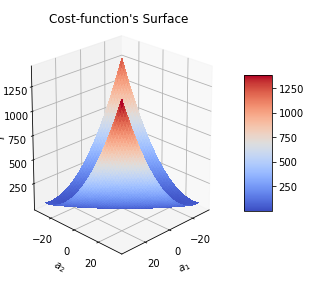

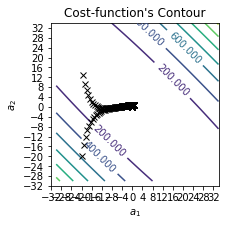

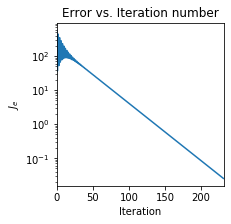

a1:0.7673337779363022
a2: 0.9633817275730259
Media of the error: 0.02473066758331071


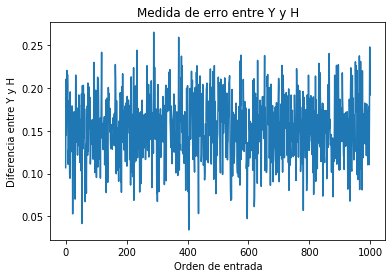

In [16]:
print('\n\n b) Min-Max sem escalar Y')
mini1 = np.amin(x1)
maxi1 = np.amax(x1)
x11 = np.zeros(shape=(M, 1))
for i, value in enumerate(x1):
    x11[i,0] = (value-mini1)/(maxi1-mini1)

mini2 = np.amin(x2)
maxi2 = np.amax(x2)
x22 = np.zeros(shape=(M, 1))
for i, value in enumerate(x2):
    x22[i,0] = (value-mini2)/(maxi2-mini2)

x11t = np.zeros(shape=(M, 1))
for i, value in enumerate(x1t):
    x11t[i,0] = (value-mini1)/(maxi1-mini1)

x22t = np.zeros(shape=(M, 1))
for i, value in enumerate(x2t):
    x22t[i,0] = (value-mini2)/(maxi2-mini2)
    
y1 = x11 + x22 + w
y1t = x11t + x22t + w

alpha = 0.06
print('Passo de aprendizagem: ' + str(alpha))
    
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y1, x11, x22, M)
plotSurfaceError3D(J, A1, A2)

Jgd, a, iteration = BatchGradientDescent(y1, x11, x22, alpha, error_threshold, maxNumIter, numParamsA, M)
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)
print('a1:' + str(a[0,iteration]) + '\na2: ' + str(a[1,iteration]))
yVsH(y1t, a[0,iteration], a[1,iteration], x11t, x22t, M)



 c) Padronizacao sem escalar Y
Passo de aprendizagem: 0.04


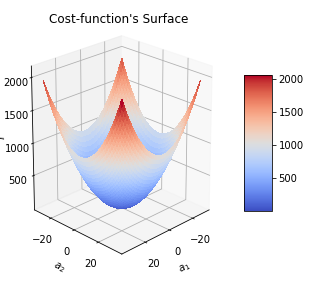

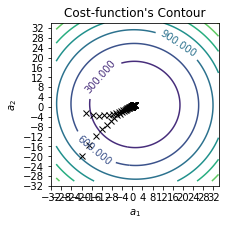

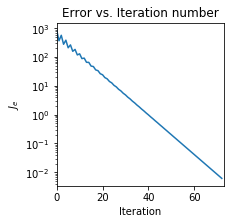

a1:0.9357159045330177
a2: 0.963922638329994
Media of the error: 0.0053609786769655676


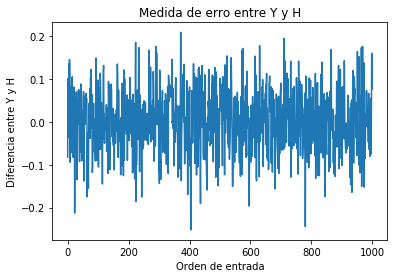

In [17]:
print('\n\n c) Padronizacao sem escalar Y')
x111 = np.zeros(shape=(M, 1))
for i, value in enumerate(x1):
    x111[i,0] = (value-media1)/(desvio1)

x222 = np.zeros(shape=(M, 1))
for i, value in enumerate(x2):
    x222[i,0] = (value-media2)/(desvio2)

x111t = np.zeros(shape=(M, 1))
for i, value in enumerate(x1t):
    x111t[i,0] = (value-media1)/(desvio1)

x222t = np.zeros(shape=(M, 1))
for i, value in enumerate(x2t):
    x222t[i,0] = (value-media2)/(desvio2)
    
y2 = x111 + x222 + w
y2t = x111t + x222t + w

alpha = 0.04
print('Passo de aprendizagem: ' + str(alpha))

# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y2, x111, x222, M)
plotSurfaceError3D(J, A1, A2)

Jgd, a, iteration = BatchGradientDescent(y2, x111, x222, alpha, error_threshold, maxNumIter, numParamsA, M)
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)
print('a1:' + str(a[0,iteration]) + '\na2: ' + str(a[1,iteration]))
yVsH(y2t, a[0,iteration], a[1,iteration], x111t, x222t, M)



 d) Min-Max escalando Y
Passo de aprendizagem: 0.06


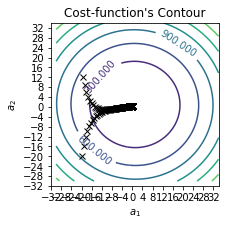

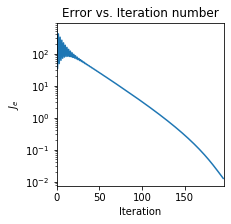

a1:0.30616628380926797
a2: 0.43856994165251206
Media of the error: 0.011669314878605699


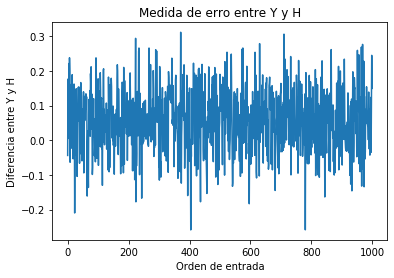

In [18]:
print('\n\n d) Min-Max escalando Y')

miniy1 = np.amin(y1)
maxiy1 = np.amax(y1)
y1s = np.zeros(shape=(M, 1))
for i, value in enumerate(y1):
    y1s[i,0] = (value-miniy1)/(maxiy1-miniy1)
    
y1ts = np.zeros(shape=(M, 1))
for i, value in enumerate(y1t):
    y1ts[i,0] = (value-miniy1)/(maxiy1-miniy1)
    
alpha = 0.06
print('Passo de aprendizagem: ' + str(alpha))

Jgd, a, iteration = BatchGradientDescent(y1s, x11, x22, alpha, error_threshold, maxNumIter, numParamsA, M)
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)
print('a1:' + str(a[0,iteration]) + '\na2: ' + str(a[1,iteration]))
yVsH(y1ts, a[0,iteration], a[1,iteration], x11t, x22t, M)



 d) Padronizacao escalando Y
Passo de aprendizagem: 0.04


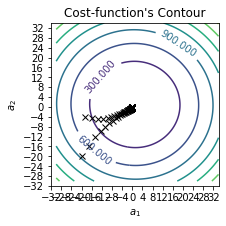

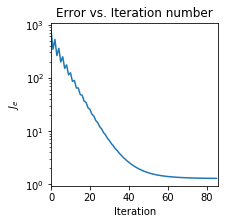

a1:0.06632199996448315
a2: -0.3976141902141363
Media of the error: 1.3521111989068482


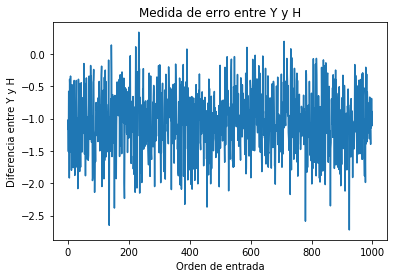

In [19]:
print('\n\n d) Padronizacao escalando Y')

y2s = np.zeros(shape=(M, 1))
for i, value in enumerate(y2):
    y2s[i,0] = (value-meanY)/(stdY)
    
y2ts = np.zeros(shape=(M, 1))
for i, value in enumerate(y2t):
    y2ts[i,0] = (value-meanY)/(stdY)
    
alpha = 0.04
print('Passo de aprendizagem: ' + str(alpha))

Jgd, a, iteration = BatchGradientDescent(y2s, x111, x222, alpha, error_threshold, maxNumIter, numParamsA, M)
plotContour(J, A1, A2, a)
plotErrorVsIteration(Jgd, iteration)
print('a1:' + str(a[0,iteration]) + '\na2: ' + str(a[1,iteration]))
yVsH(y2ts, a[0,iteration], a[1,iteration], x111t, x222t, M)